<a href="https://colab.research.google.com/github/peteray-dev/Space-Titanic/blob/master/Space_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
# latest version of sklearn (to have access to recent features)
!pip install --upgrade scikit-learn==1.4.0 -q

In [200]:
import sklearn
# this makes is easier for getting dataframes by default as input/output of
# sklearn pipelines
sklearn.set_config(transform_output="pandas")

In [201]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
import warnings
warnings.filterwarnings('ignore')

In [202]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression, RFECV, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, PredictionErrorDisplay, classification_report, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay



In [203]:
train = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [204]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [206]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [207]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [208]:
train.drop(columns=['Name'], inplace=True)
test_df.drop(columns=[ 'Name'], inplace=True)


In [209]:
test_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0


In [210]:
#Understing the number of unique values in each of the columns
spa_var = train.select_dtypes(include='object').columns.tolist()
cat_spa_df = train[spa_var]

for feat in spa_var:
    print(feat, ':', cat_spa_df[feat].nunique(), 'unique_values')



PassengerId : 8693 unique_values
HomePlanet : 3 unique_values
CryoSleep : 2 unique_values
Cabin : 6560 unique_values
Destination : 3 unique_values
VIP : 2 unique_values


In [211]:
# Replacing missing values
"""
all categorical features are replaced with simple imputer, while the year of registration and
mileage are replace using KNNImputer using their nearest neighbours
to avoid decimals in year of registeration, they are rounded up

"""
def replace_missing_val(df):
  cat_feat = df.select_dtypes(include='object').columns.tolist()
  cat_trans = Pipeline(
      steps=[
          ("imputer", SimpleImputer(strategy='most_frequent'))
      ]
  )
  num_feat = df.select_dtypes(exclude='object').columns.tolist()
  num_trans = Pipeline(
      steps=[
          ('knnimputer', KNNImputer(n_neighbors=4))
      ]
  )



  df[cat_feat] = cat_trans.fit_transform(df[cat_feat])
  df[num_feat] = num_trans.fit_transform(df[num_feat])

  df[['group_ID', 'passenger_num']] = df['PassengerId'].str.split('_', expand=True)
  df['deck_side'] = df['Cabin'].str.split('/').str[-1]

  df.drop(columns = 'PassengerId', inplace=True)
  return df



In [212]:
train = replace_missing_val(train)
test = replace_missing_val(test_df)

In [213]:
test.isnull().sum()

HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
group_ID         0
passenger_num    0
deck_side        0
dtype: int64

In [214]:
train.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group_ID,passenger_num,deck_side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0001,01,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1.0,0002,01,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0.0,0003,01,S


<Axes: xlabel='Age'>

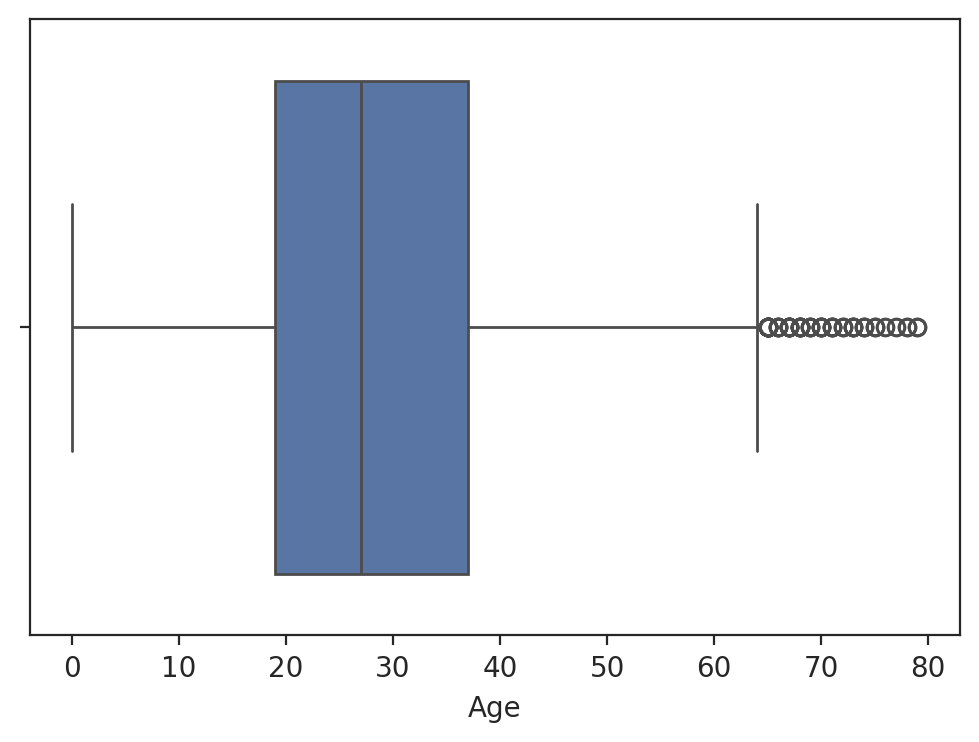

In [215]:
sns.boxplot(data=train, x='Age')

In [216]:
#Understing the number of unique values in each of the columns
spa_var = train.select_dtypes(include='object').columns.tolist()
cat_spa_df = train[spa_var]

for feat in spa_var:
    print(feat, ':', cat_spa_df[feat].nunique(), 'unique_values')



HomePlanet : 3 unique_values
CryoSleep : 2 unique_values
Cabin : 6560 unique_values
Destination : 3 unique_values
VIP : 2 unique_values
group_ID : 6217 unique_values
passenger_num : 8 unique_values
deck_side : 2 unique_values


In [217]:
train['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [218]:
X = train.drop(columns = 'Transported')
y = train['Transported']

X_train,X_valid, y_train,  y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [219]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 4278 to 2732
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     6954 non-null   object 
 1   CryoSleep      6954 non-null   object 
 2   Cabin          6954 non-null   object 
 3   Destination    6954 non-null   object 
 4   Age            6954 non-null   float64
 5   VIP            6954 non-null   object 
 6   RoomService    6954 non-null   float64
 7   FoodCourt      6954 non-null   float64
 8   ShoppingMall   6954 non-null   float64
 9   Spa            6954 non-null   float64
 10  VRDeck         6954 non-null   float64
 11  group_ID       6954 non-null   object 
 12  passenger_num  6954 non-null   object 
 13  deck_side      6954 non-null   object 
dtypes: float64(6), object(8)
memory usage: 814.9+ KB


In [220]:
def Preprocessing_enc_sca(X, y):

  num_feat=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',  ]
  cat_ohe_feat=[ 'HomePlanet', 'CryoSleep', 'Destination', 'VIP' , 'deck_side']
  cat_tar_feat=[ 'Cabin', 'group_ID', 'passenger_num']

  num_trans = Pipeline(
        steps = [
            ("scaler", MinMaxScaler())
        ]
  )

  cat_trans_oh = Pipeline(
        steps=[
            ("encoder", OneHotEncoder(
                sparse_output=False,
                drop="if_binary"
            ))
        ]
  )

  cat_trans_te = Pipeline(
        steps=[
            ("encoder", TargetEncoder(target_type='continuous',
                                      shuffle=False)),
            ("scaler", MinMaxScaler())
        ]

  )


  preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_trans, num_feat),
        ("cat_oh", cat_trans_oh, cat_ohe_feat),
        ("cat_te", cat_trans_te, cat_tar_feat)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
  )

  return preprocessor

In [221]:
processor = Preprocessing_enc_sca(X, y)

In [222]:
processor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'RoomService', 'FoodCourt',
                                  'ShoppingMall', 'Spa', 'VRDeck']),
                                ('cat_oh',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 ['HomePlanet', 'CryoSleep', 'Destination',
                                  'VIP', 'deck_side']),
                                ('cat_te',
                                 Pipeline(steps=[('encoder',
                                                  TargetEncoder(shuffle=False,
                                                                target_type='continuous')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Cabin', 'group_ID', 'passenger_num'])],
                  verbose_feature_names_out=False)

In [223]:
X_train_pro = processor.fit_transform(X_train, y_train)

In [224]:
X_valid_pro = processor.transform(X_valid)

In [225]:
test_pro = processor.transform(test)

In [226]:
#I will try feature engineering and feature selection later

In [227]:
rf = RandomForestClassifier()

rf.fit(X_train_pro, y_train)

RandomForestClassifier()

In [228]:
rf.score(X_valid_pro, y_valid)

0.7849338700402531

In [229]:
rf.score(X_train_pro, y_train)

0.9872016105838366

In [230]:
y_pred = rf.predict(X_valid_pro)

In [231]:

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       863
         1.0       0.79      0.77      0.78       876

    accuracy                           0.78      1739
   macro avg       0.79      0.79      0.78      1739
weighted avg       0.79      0.78      0.78      1739



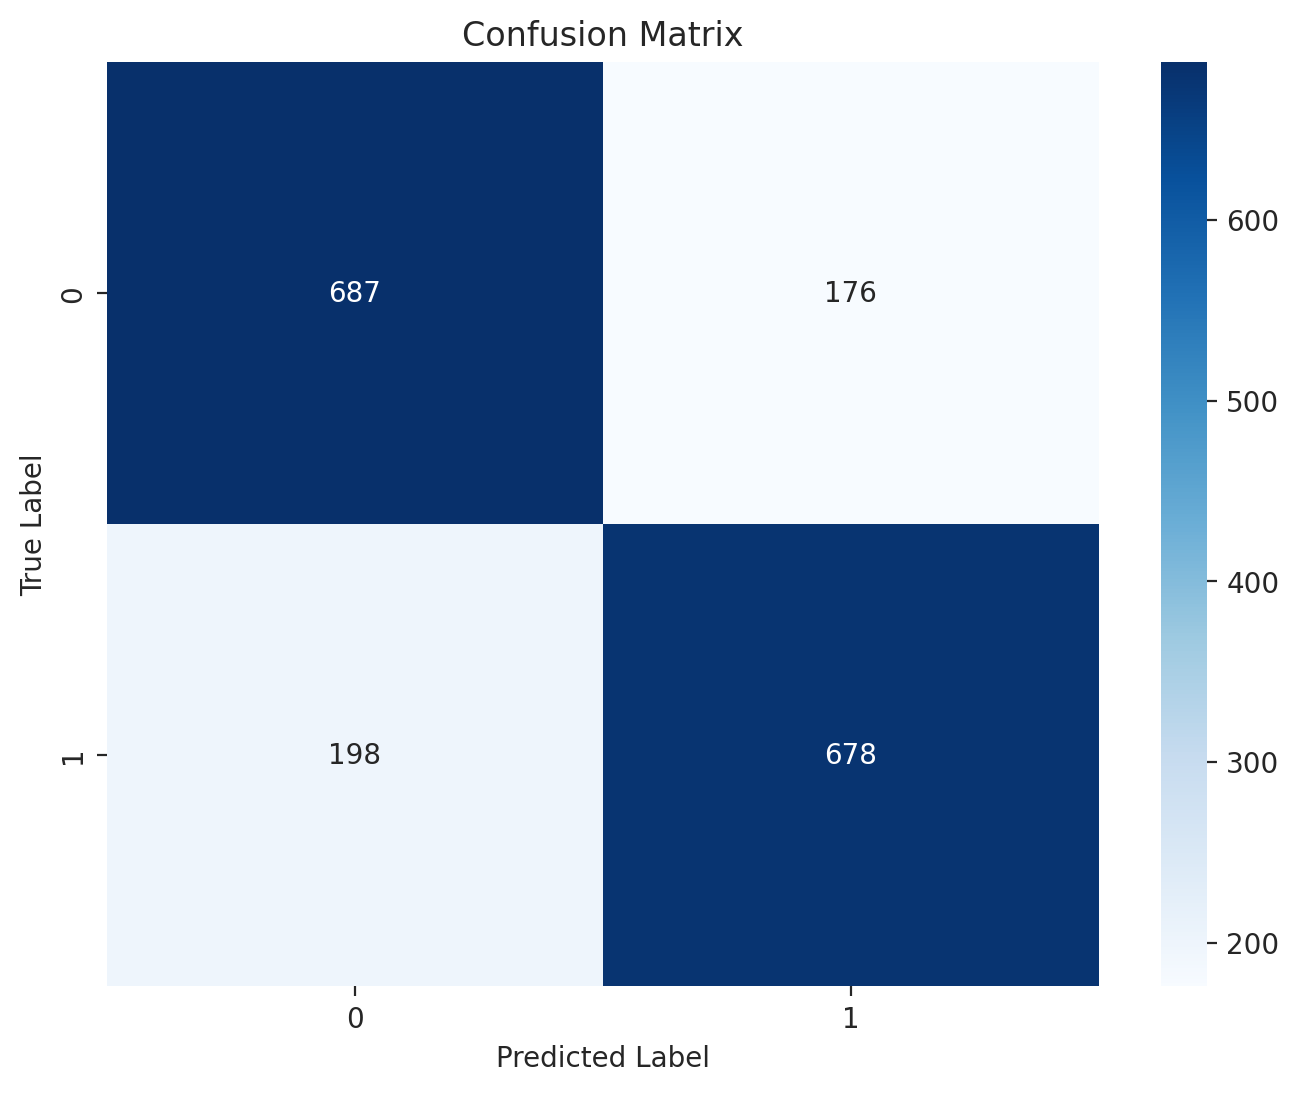

In [232]:
cm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [233]:
test_pred = rf.predict(test_pro)

In [235]:
test_real = pd.read_csv('/content/test.csv')

In [236]:
submission = pd.DataFrame({
    'PassengerId': test_real['PassengerId'],
    'Transported': test_pred
})
submission.to_csv('submission.csv', index=False)
print("Submission file has been created and saved as 'submission.csv'")

Submission file has been created and saved as 'submission.csv'
